# Problem Statement

A US bike-sharing company, BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company wants a  business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands


## Step1 : Reading and Understand the input data

In [684]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [685]:
bbikes = pd.read_csv("day.csv")
bbikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [686]:
bbikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [687]:
#NUMBER OF ROWS AND COLUMNS IN DATASET
rows, Cols = bbikes.shape
print(f"Dataset has {rows} rows and {Cols} columns")
#bbikes.shape

Dataset has 730 rows and 16 columns


In [688]:
#removing white spaces from the Columns
bbikes = bbikes.rename(columns= lambda x: x.strip(),inplace=False)

In [689]:
#Checking if there are any null columns
bbikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [690]:
#Identifying Percentage of missing values from each Columns
missing_values = (bbikes.isnull().sum()* 100 /len(bbikes))
missing_values.sort_values(ascending = False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

From the above observation, there are no missing values from any of the columns

In [691]:
#Chekcing if there are any duplicate columns, if exists would be removed
df = bbikes.loc[:,bbikes.columns.duplicated()].copy()
rows,cols = df.shape
print(f"There are {cols} duplicate Columns to be removed")

There are 0 duplicate Columns to be removed


In [692]:
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [693]:
# Check for any duplicate entries
bbikes.duplicated().sum()

0

Findings:
    1. 'cnt' is the target variable for our dataset 
    2. instant column is a index of the record which does not help on analysis or predictions, So we will drop the column
    3. dteday as we have seperate columns for Year, Month and day, we are good to drop this we well
    4. Since casual and registered are used as sum to get the target variable cnt, so this is not used in Predicting model, so we will drop this variable

In [694]:
#Dropping few columns which are not required for analysis
#dataframe.drop(['member_id','url','desc','zip_code'],axis=1,inplace=True)
#dataframe.shape

In [695]:
# drop columns instance, dteday, casual, registered and atemp
bbikes.drop(['instant', 'dteday','casual','registered'], axis=1, inplace=True)
bbikes.shape

(730, 12)

In [696]:
bbikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Segregating Categorial Variables and non-categorial variables

In [697]:
# identify categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

# identify numeric variables
num_vars = ['temp', 'atemp','hum','windspeed','cnt']

In [698]:
bbikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


As given in the data dictionary, season, Year, Month, Holiday, weathersit have some categories defines, lets replace the values in the dataset and visualise for better understanding

Below categorical columns are having following catecteristics and can be maped with respective values:

 - season column is having four seasons as (1:spring, 2:summer, 3:fall, 4:winter)
 - mnth column is having 12 categorical values denoting for months Jan to Dec
 - weathersit is having for categorical values (1: Clear_FewClouds, 2: Mist_Cloudy, 3: LightSnow_LightRain, 4: HeavyRain_IcePallets)
 - weekday column having 7 varibles ( 0 to 6 ) denoting (0: Sun, 1: Mon 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat)
 - yr, holiday, workingday are having binary values. So we will not map these columns

In [699]:
# maped the season column according to descripttions
bbikes['season'] = bbikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# maped the weekday column according to descriptin
bbikes['weekday'] = bbikes['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# maped mnth column values (1 to 12 ) as (jan to dec) respectively
bbikes['mnth'] = bbikes['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

#  maped weathersit column
bbikes['weathersit'] = bbikes['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

In [700]:
# convert dtype of categorical variables
bbikes[cat_vars] = bbikes[cat_vars].astype('category')

In [701]:
bbikes.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,fall,0,aug,0,Mon,1,Clear_FewClouds
freq,188,365,62,709,105,499,463


From the above table it is very clear that we have 3-binary columns(yr,Holiday, workingday) And as per the data dictionary weathersit has 4 categories but the unique count here is 3, lets visualise this part and see what is happening as we progress

In [702]:
bbikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600


### Step - 2. Data Visualisation 

#### Univariate Analysis

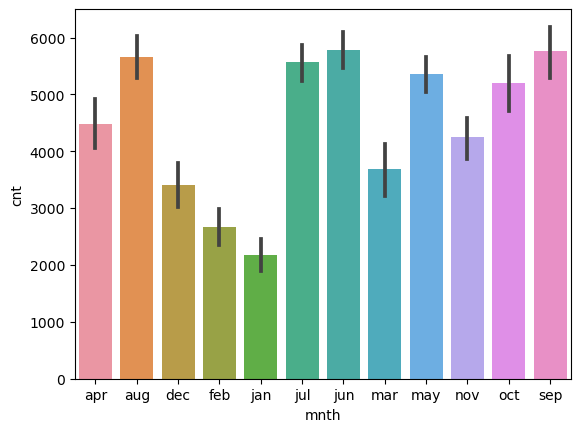

In [703]:
sns.barplot(x = 'mnth', y = 'cnt', data = bbikes)
plt.show()

Month: We could see business was is dull during Jan, Feb and is graduall increased till sep then it falls down again

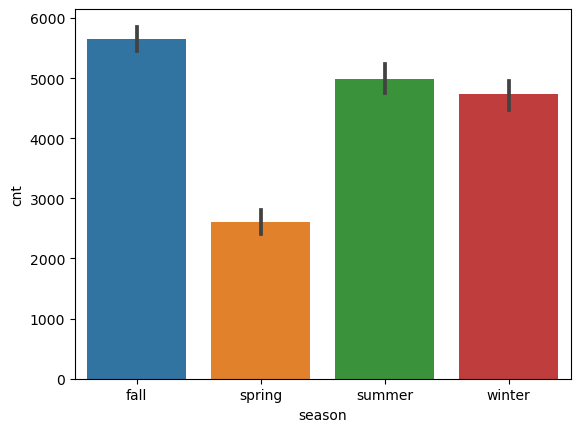

In [704]:
# identify categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

sns.barplot(x = 'season', y = 'cnt', data = bbikes)
plt.show()

It can be observed that the demand for bikes are more in Fall, Summer, Winter rather than Sprint seasons

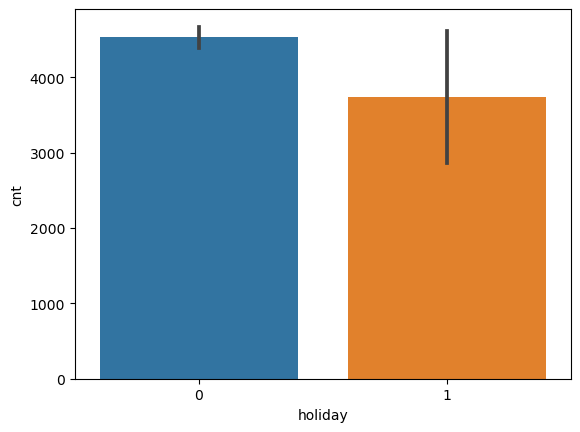

In [705]:
# identify categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

sns.barplot(x = 'holiday', y = 'cnt', data = bbikes)
plt.show()

From the above bar graph, the bikes are due to demand during the weekdays rather than the holidays

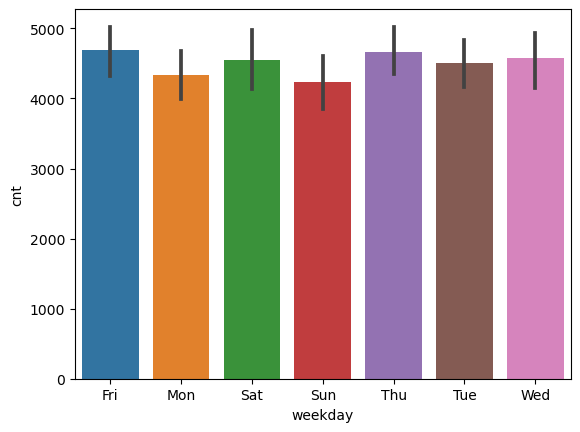

In [706]:
sns.barplot(x = 'weekday', y = 'cnt', data = bbikes)
plt.show()

There is no much variance on the week days or week ends

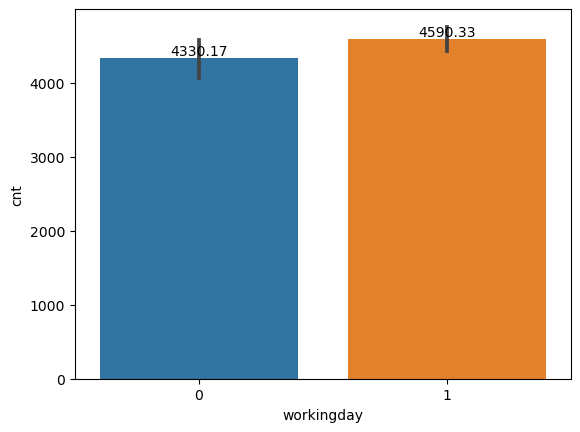

In [707]:
ax=sns.barplot(x = 'workingday', y = 'cnt', data = bbikes)
ax.bar_label(ax.containers[0])
plt.show()

Workingday: Bisuness is operating almost same/similar workign days and in nonworking days as well

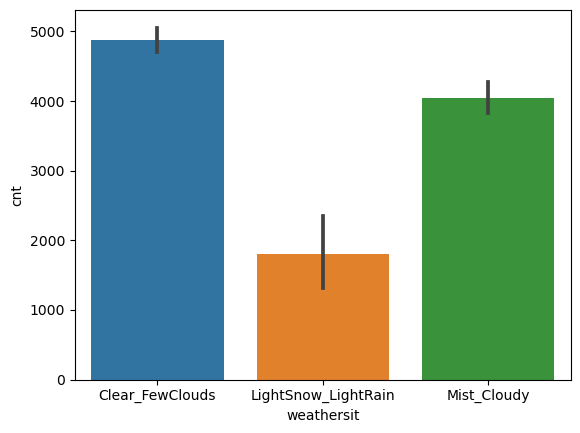

In [708]:
sns.barplot(x = 'weathersit', y = 'cnt', data = bbikes)
plt.show()

 - As mentioned above during the segration and replacing the categorial values, there is no data for one of the category i.e 
   Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog. 
 - Demand of bikes are high during clear_fewClouds and reduces during mist_cloudy and LightSnow_LightRain situations

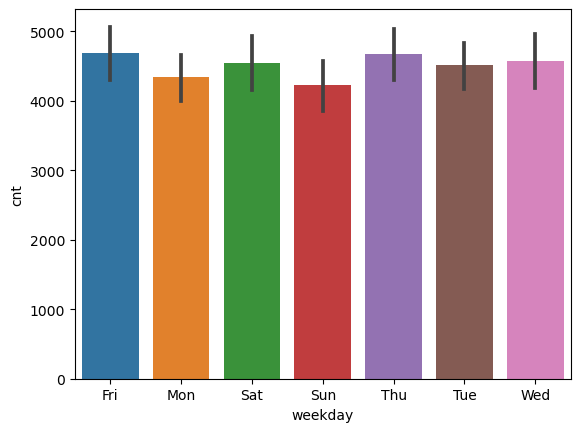

In [709]:
sns.barplot(x = 'weekday', y = 'cnt', data = bbikes)
plt.show()

Demand is almost same on all weekdays/weekends

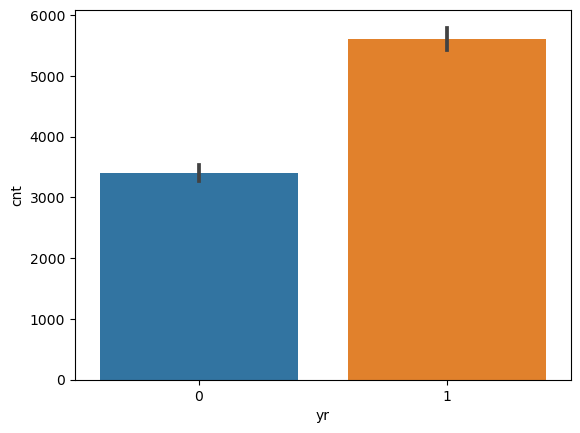

In [710]:
sns.barplot(x = 'yr', y = 'cnt', data = bbikes)
plt.show()

Yr: Number of days operation in 2019 is more than 2018

In [711]:
# identify categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

### Bi-Variate analysis

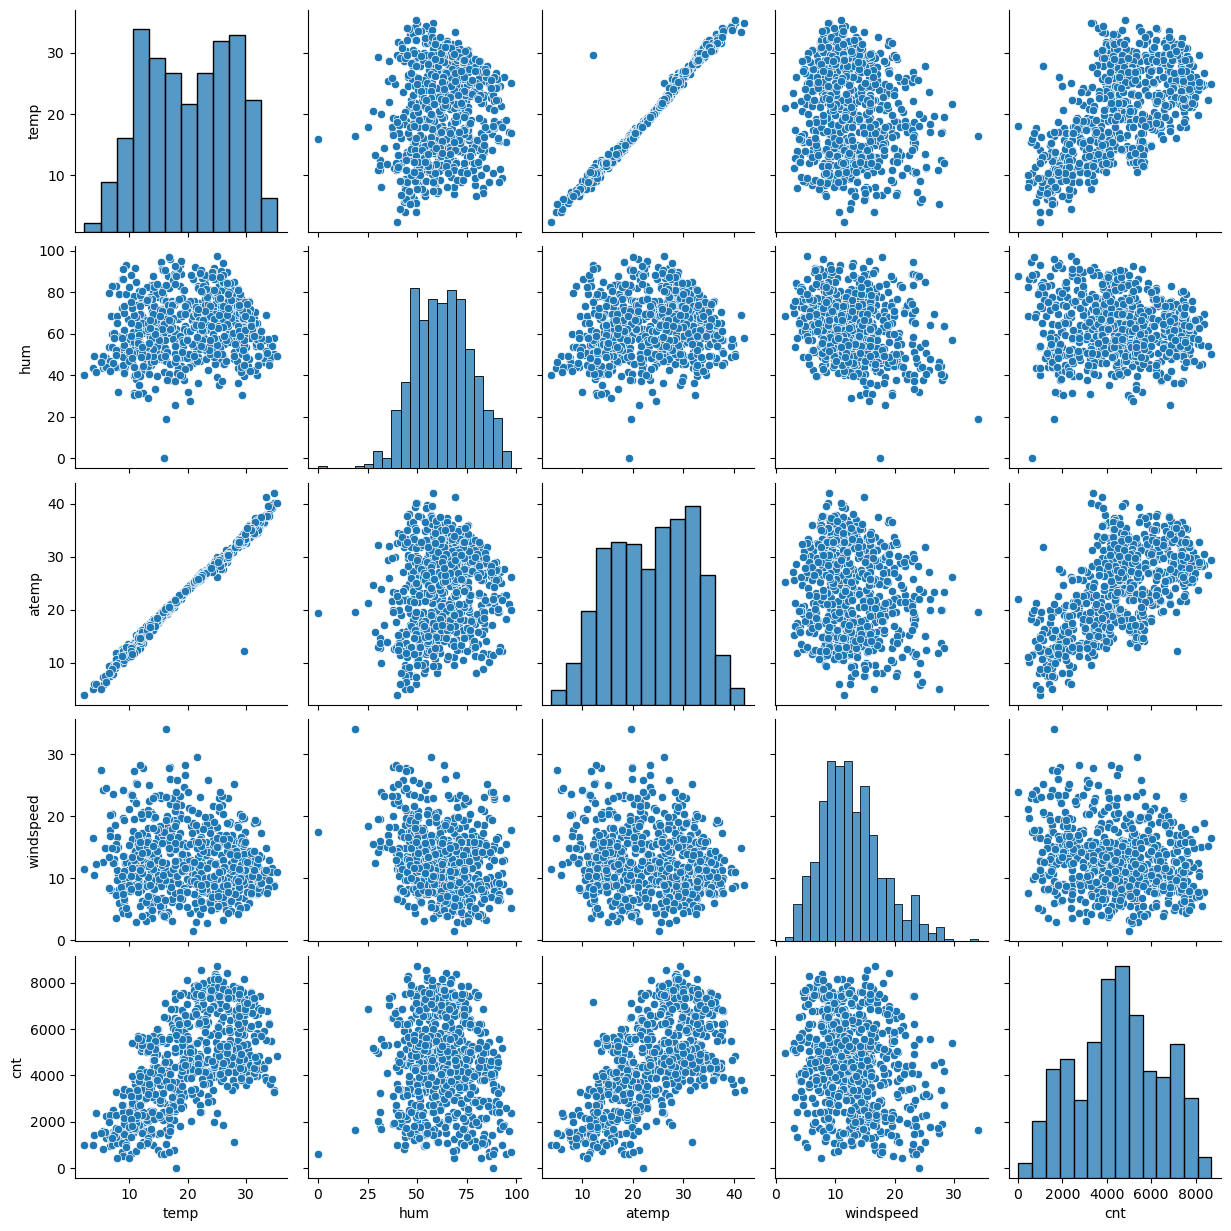

In [712]:
sns.pairplot(bbikes[['temp','hum','atemp','windspeed','cnt']])
plt.show()

From the above plot it is clear that temp, atemp are directly relative to each other and we can remove one of the column for furthur predictions 

In [713]:
#bbikes.drop(['atemp'])
bbikes.columns
bbikes.drop(['atemp'],axis=1,inplace=True)

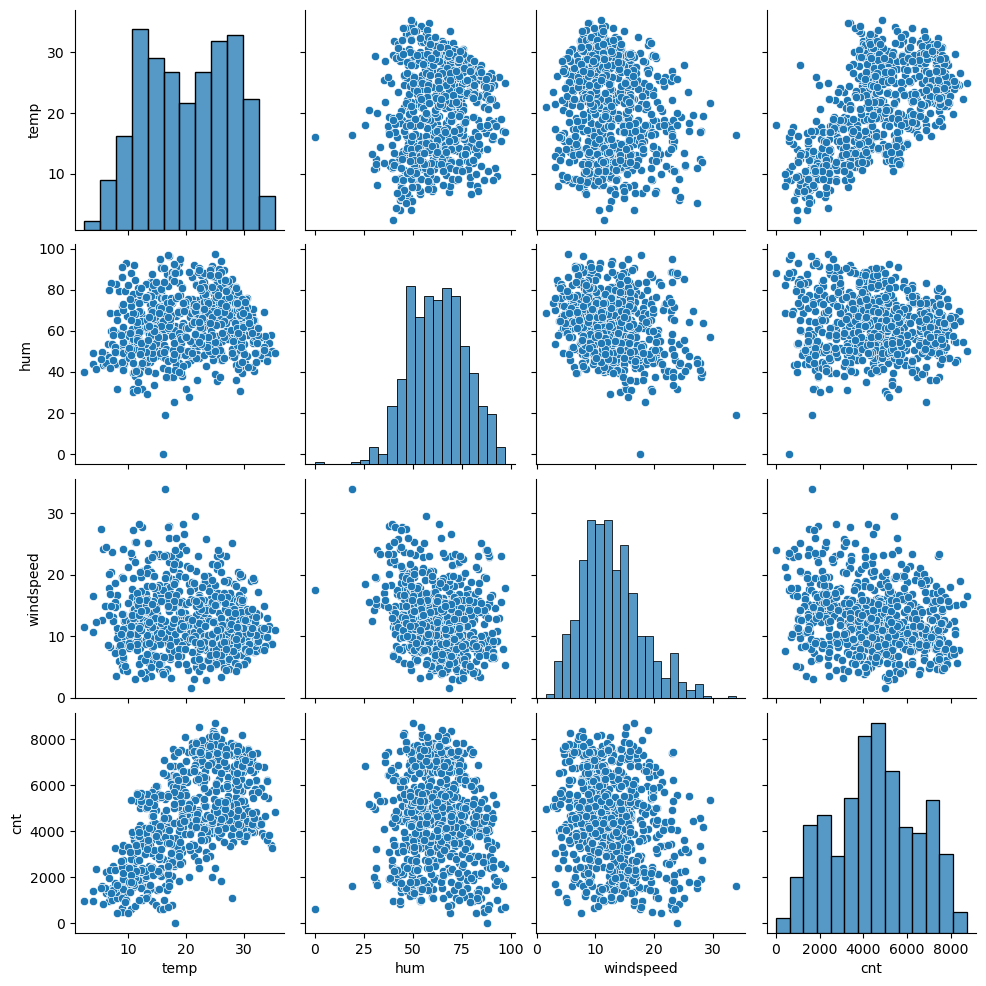

In [714]:
#Pairplot after removing the atemp variable
sns.pairplot(bbikes[['temp','hum','windspeed','cnt']])
plt.show()

To Check the co-relation, we will plot the heapmap and check

In [715]:
bbikes.shape

(730, 11)

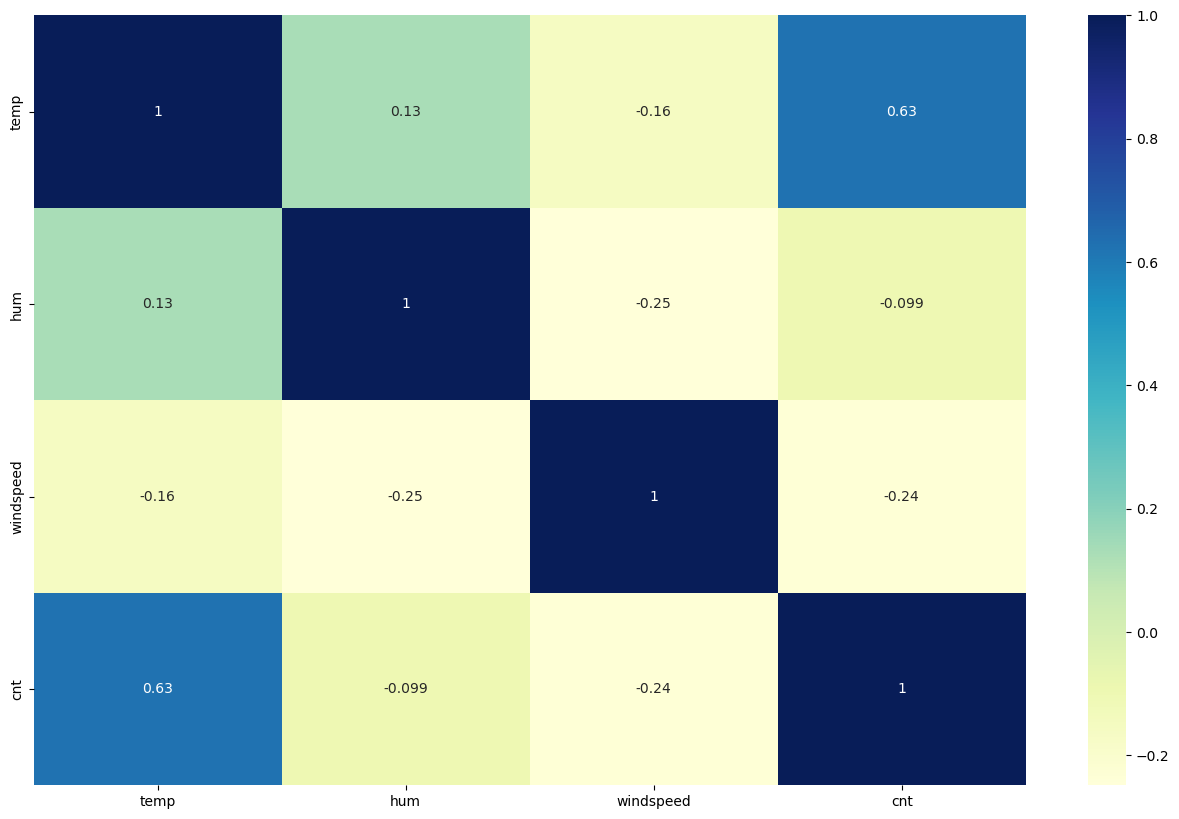

In [716]:
#1. Plot a heat map
plt.figure(figsize=(16,10))
sns.heatmap(bbikes.corr(),annot=True,cmap='YlGnBu')
plt.show()

1. From the above heatmap temp and cnt has positive corelation where as windspeed has negative corelation
2. hum is very less corelated

## Step 3 : Data Preparation

In [717]:
bbikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [718]:
#Creating dummy Variables for furnishingStatus
status = pd.get_dummies(bbikes[['season','mnth','weekday', 'weathersit']])
status.head()

#droping a redudant dummy variable
status = pd.get_dummies(bbikes[['season','mnth','weekday', 'weathersit']],drop_first=True)
status.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now concat the status dataset into the bbikes dataset and drop the original variables

In [719]:
#Now concat the dummy data with original one
bbikes = pd.concat([bbikes,status],axis=1)
bbikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,spring,0,jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,Mon,1,Clear_FewClouds,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,Tue,1,Clear_FewClouds,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,Wed,1,Clear_FewClouds,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


Since we have created dummy variable for season, month, weekday, weathersit, these variables can be dropped from the dataset.

In [720]:
# drop season column
bbikes.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

bbikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [721]:
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   yr                              730 non-null    category
 1   holiday                         730 non-null    category
 2   workingday                      730 non-null    category
 3   temp                            730 non-null    float64 
 4   hum                             730 non-null    float64 
 5   windspeed                       730 non-null    float64 
 6   cnt                             730 non-null    int64   
 7   season_spring                   730 non-null    uint8   
 8   season_summer                   730 non-null    uint8   
 9   season_winter                   730 non-null    uint8   
 10  mnth_aug                        730 non-null    uint8   
 11  mnth_dec                        730 non-null    uint8   
 12  mnth_feb              

Since we converted yr,holiday, workingday ro category type from binary, now we are converting those back to binary values back

In [722]:
# Convert categorical columns to numeric 
bbikes[['yr','holiday','workingday']]= bbikes[['yr','holiday','workingday']].astype('uint8')

In [723]:
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_spring                   730 non-null    uint8  
 8   season_summer                   730 non-null    uint8  
 9   season_winter                   730 non-null    uint8  
 10  mnth_aug                        730 non-null    uint8  
 11  mnth_dec                        730 non-null    uint8  
 12  mnth_feb                        730 

In [724]:
bbikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting data into test and train set

In [725]:
# Split train test dataset
df_train, df_test = train_test_split(bbikes, train_size = 0.7, random_state = 100 )
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [726]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Rescaling the Features

As we see that there are some values with different scales for better modelling we have to re-scale them, so now lets do that using MinMaxScalar

In [727]:
#1. Instantiate an object (We will only scale numerial variables as categorial(binary variable are already with 0 and 1))
scalar = MinMaxScaler()
# Create a list of numeric vars

num_vars = ['temp','hum','windspeed','cnt']

#2. Fit on data
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [728]:
df_train[num_vars].describe()  # This shows that after rescaling all min values are 0 for numeric variable and max value is 1

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


# Step 4: Training the Model

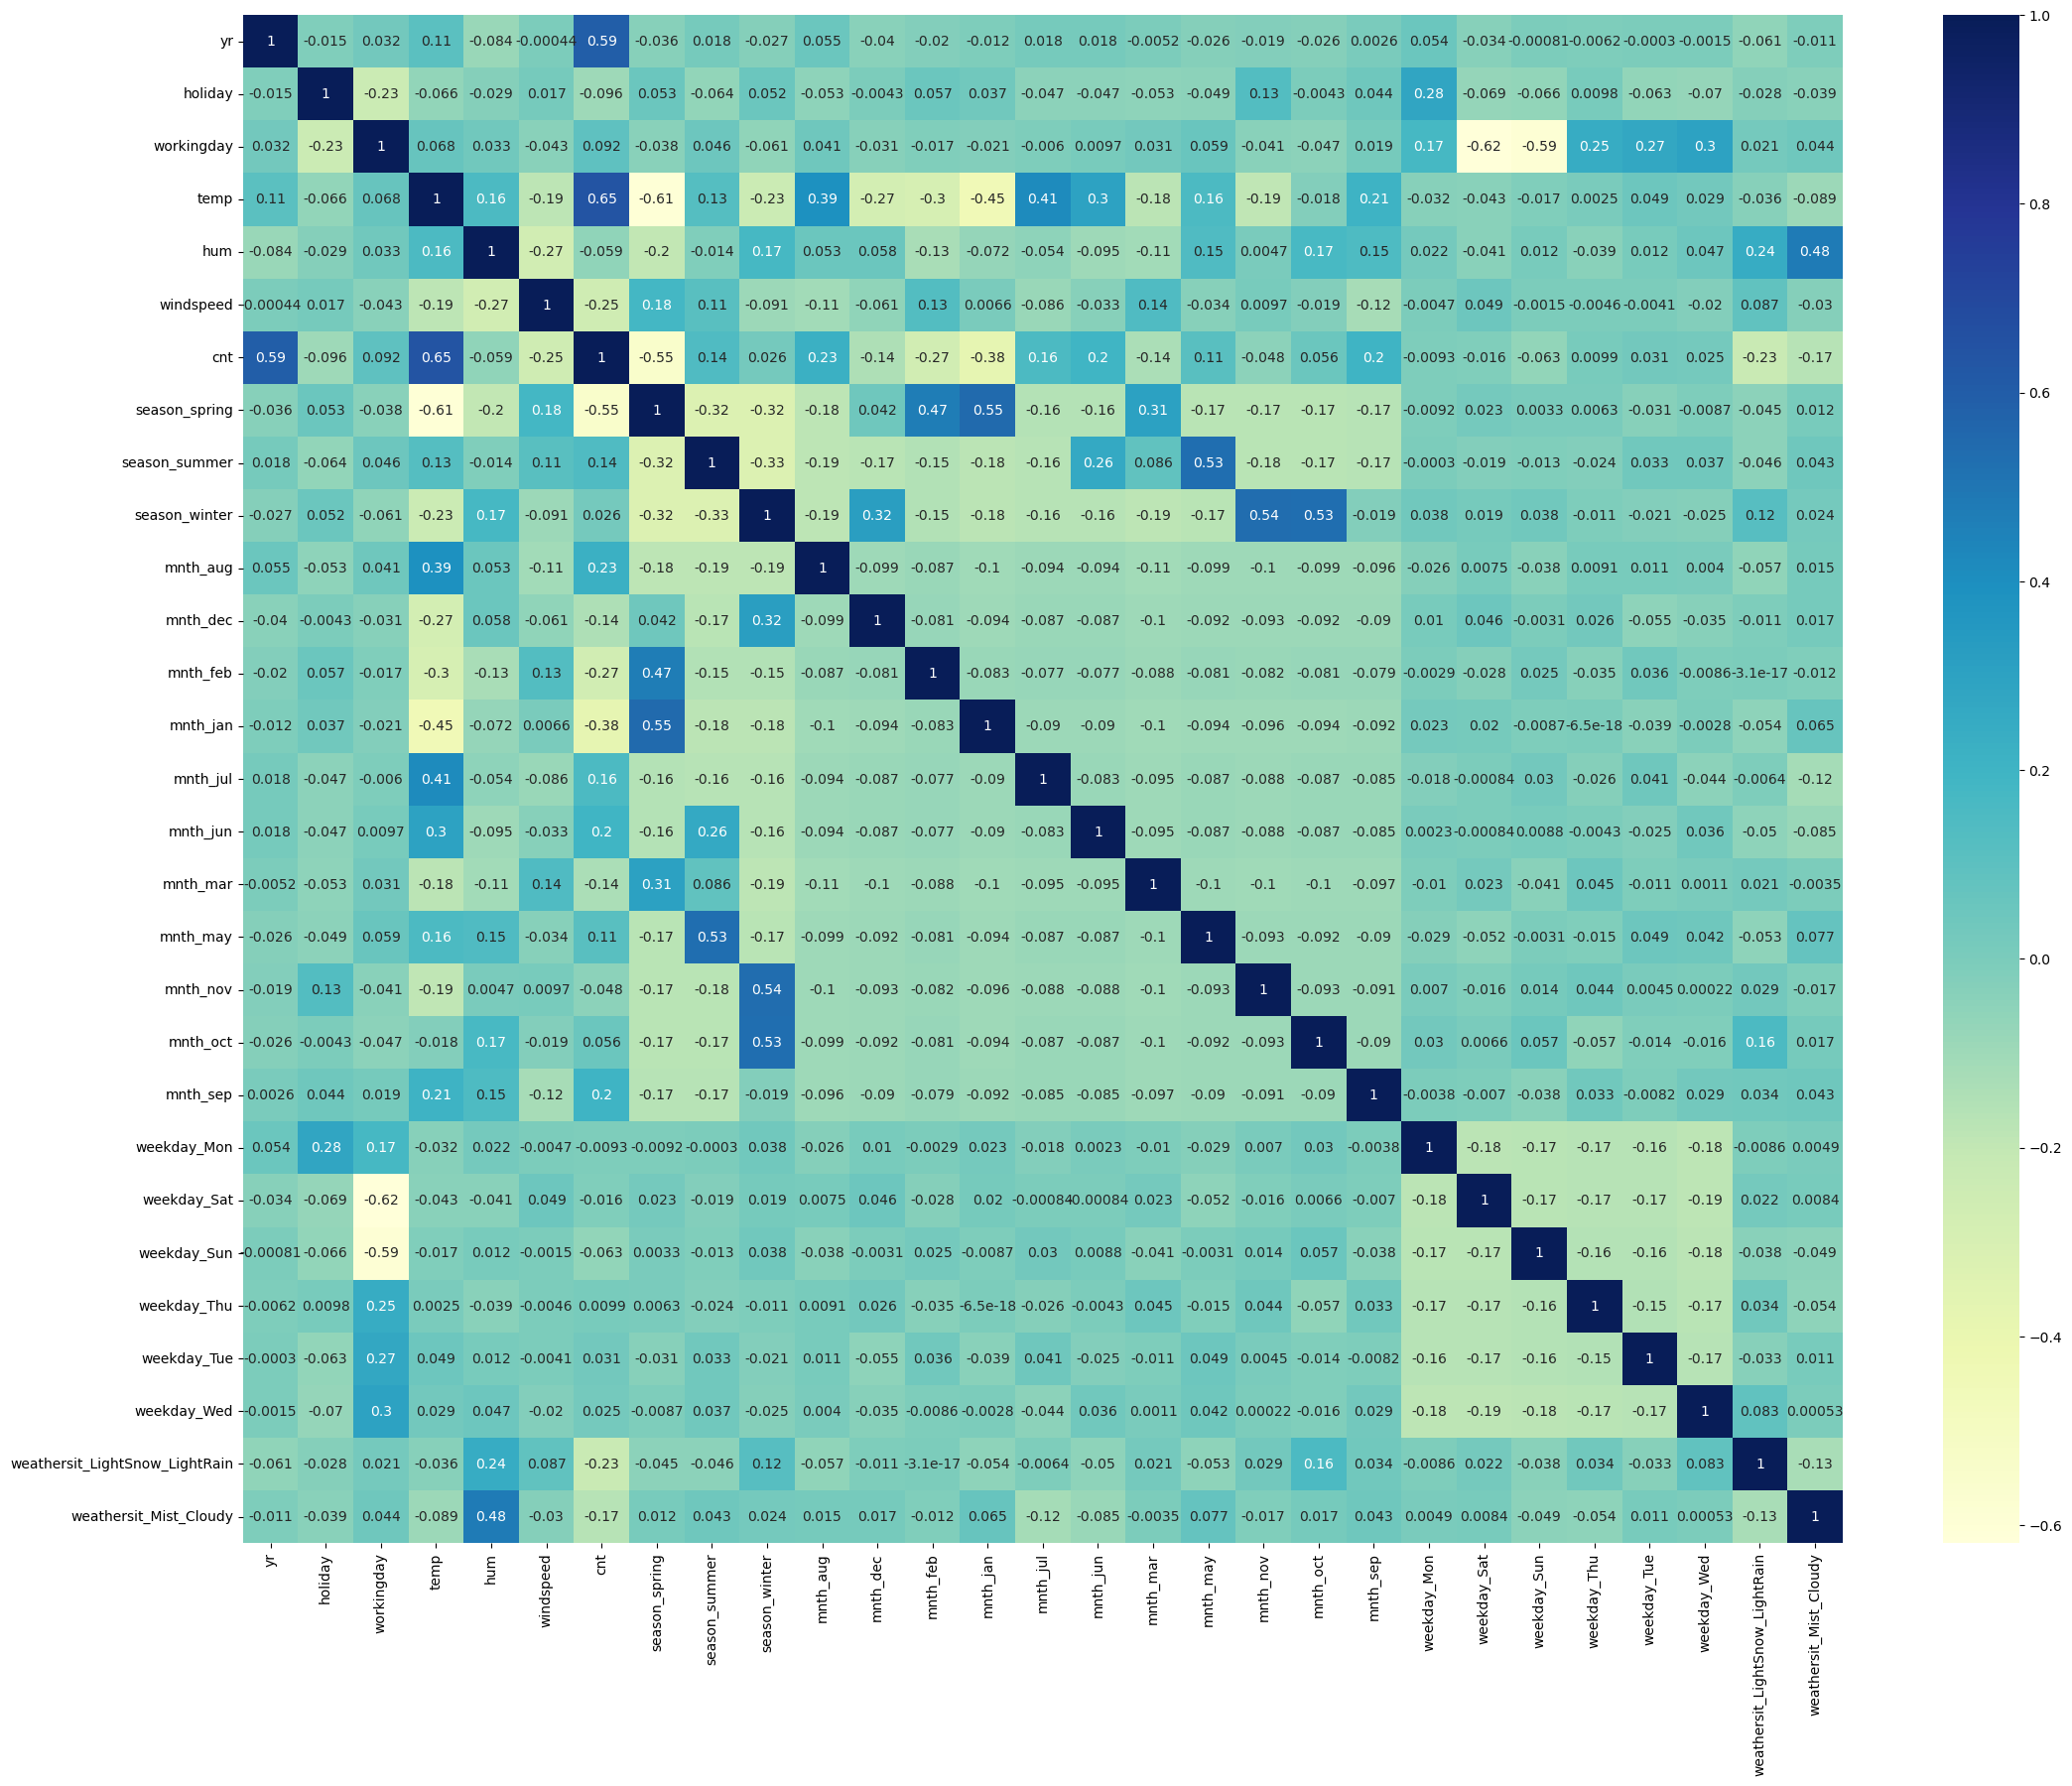

In [729]:
#1. Plot a heat map
plt.figure(figsize=(26,20))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [730]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [731]:
#Split data set into X and y sets (for both train and test set)

y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Building a Model

We learnt about 3 different techinuques to build a model,
1. By adding variables
2. By removing variable using p-Value and VIF calculated
3. Using RFE

Now lets try with RFE and build the required model

#Using Stat models

Import the model
Add a constant

In [732]:
#Runnong RFE with the output number of variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [733]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 12),
 ('weathersit_LightSnow_LightRain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [734]:
# Selected columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_Sat', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [735]:
#Creating X_Train dataset with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sep,weekday_Sat,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1


In [736]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          2.11e-191
Time:                        10:54:10   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2402      0.036      6.714      0.000       0.170       0.310
yr                                 0.2298      0.008     28.647      0.000       0.214       0.246
holiday                           -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday                         0.0430      0.012      3.725      0.000       0.020       0.066
temp                               0.5277      0.033     15.884      0.000       0.462       0.593
hum                               -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                         -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring                     -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer                      0.0537      0.015      3.631      0.000       0.025       0.083
season_winter                      0.0992      0.017      5.815      0.000       0.066       0.133
mnth_jul                          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_sep                           0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Sat                        0.0530      0.015      3.648      0.000       0.024       0.082
weathersit_LightSnow_LightRain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist_Cloudy            -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [737]:
#Removing const variable to calcualte the VIF
X_train_rfe_copy=X_train_rfe.copy()
print(X_train_rfe_copy.shape)
print(X_train_rfe.shape)

# Removing const field to valucate the VIF
X = X_train_rfe_copy.drop('const',axis=1)
X.head()

(510, 15)
(510, 15)


,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sep,weekday_Sat,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1


In [738]:
#Lets Calculate the VIF and check
vif = pd.DataFrame()
vif['Features'] = X.columns
#vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.42
7,season_summer,2.85
13,weathersit_Mist_Cloudy,2.29
0,yr,2.08
11,weekday_Sat,1.97


Insights:

 - R2 : 0.847 and R2- adj : 0.843. All the variables are having pvalue<0.05. Now we will look into VIF.
 - VIF: hum is having highest VIF (28.46), which is >5 . We will drop the variable and update the model.

In [739]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sep,weekday_Sat,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1


### Drop variable and update model

In [740]:
X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()
#C

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          1.28e-188
Time:                        10:54:11   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1576      0.031      5.126      0.000       0.097       0.218
yr                                 0.2337      0.008     28.828      0.000       0.218       0.250
holiday                           -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday                         0.0461      0.012      3.931      0.000       0.023       0.069
temp                               0.4915      0.033     15.027      0.000       0.427       0.556
windspeed                         -0.1491      0.025     -6.024      0.000      -0.198      -0.100
season_spring                     -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer                      0.0477      0.015      3.180      0.002       0.018       0.077
season_winter                      0.0846      0.017      4.971      0.000       0.051       0.118
mnth_jul                          -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_sep                           0.0759      0.017      4.537      0.000       0.043       0.109
weekday_Sat                        0.0579      0.015      3.924      0.000       0.029       0.087
weathersit_LightSnow_LightRain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
weathersit_Mist_Cloudy            -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [741]:
#Lets Calculate the VIF and check
vif = pd.DataFrame()
vif['Features'] = X.columns
#vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,season_spring,2.49
6,season_summer,2.34
0,yr,2.07
7,season_winter,1.98
10,weekday_Sat,1.96
8,mnth_jul,1.58
12,weathersit_Mist_Cloudy,1.57


Insights:
    
After dropping the high VIF variable, and rebuilding the model, below are the insights

 - There is a very slight drop in R2 from : 0.847  to 0.841 which is an acceptable range
 - And the same observation in R2- adj also slight drop from : 0.843 to 0.837, again which is ok
 - p-value for all the features are < 0.05, hence no dropping of features is required based on p-value
 - VIF: After re-calculating the VIF, now we have temp with the highest VIF and > 5 but in EDA we found that temp is positively    corelated with out target variable 'cnt' so we keep it.
 - However the next highest VIF value is for 'workingday' lets check removing windspeed makes any difference

In [742]:
X = X.drop('workingday',axis=1)
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          1.68e-186
Time:                        10:54:11   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1960      0.030      6.628      0.000       0.138       0.254
yr                                 0.2340      0.008     28.451      0.000       0.218       0.250
holiday                           -0.0941      0.026     -3.605      0.000      -0.145      -0.043
temp                               0.4924      0.033     14.839      0.000       0.427       0.558
windspeed                         -0.1500      0.025     -5.974      0.000      -0.199      -0.101
season_spring                     -0.0670      0.021     -3.174      0.002      -0.108      -0.026
season_summer                      0.0468      0.015      3.078      0.002       0.017       0.077
season_winter                      0.0816      0.017      4.733      0.000       0.048       0.115
mnth_jul                          -0.0525      0.019     -2.820      0.005      -0.089      -0.016
mnth_sep                           0.0766      0.017      4.515      0.000       0.043       0.110
weekday_Sat                        0.0199      0.011      1.761      0.079      -0.002       0.042
weathersit_LightSnow_LightRain    -0.2846      0.025    -11.529      0.000      -0.333      -0.236
weathersit_Mist_Cloudy            -0.0803      0.009     -9.176      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       65.293   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.851
Skew:                          -0.706   Prob(JB):                     2.60e-31
Kurtosis:                       5.152   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [743]:
#Lets Calculate the VIF and check
vif = pd.DataFrame()
vif['Features'] = X.columns
#vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,season_summer,2.23
4,season_spring,2.10
0,yr,2.07
6,season_winter,1.79
7,mnth_jul,1.58
11,weathersit_Mist_Cloudy,1.55
8,mnth_sep,1.34
9,weekday_Sat,1.19


Insights:
    
After dropping the high VIF variable, and rebuilding the model, below are the insights

 - There is a very slight drop in R2 from : 0.841  to 0.836 which is an acceptable range
 - And the same observation in R2- adj also slight drop from : 0.837 to 0.832, again which is ok
 - p-value for all the features are < 0.05, hence no dropping of features is required based on p-value
 - VIF: After re-calculating the VIF, now we have temp with the highest VIF and it is less than 10, which 
   is ok to Keep as during EDA we found that temp is positively corelated with out target variable,

Since after dropping few variables, the p-values is almost 0 and the VIF for all the values < 5, this is pretty decent and we can proceed furthur

In [744]:
# list down and check variables of final model
# assign final model to lm_final
lm_final = lr_model

var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

Final Selected Variables: ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_Sat', 'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy']


In [745]:
lm_final.params

const                             0.195960
yr                                0.233995
holiday                          -0.094100
temp                              0.492397
windspeed                        -0.149965
season_spring                    -0.067013
season_summer                     0.046808
season_winter                     0.081610
mnth_jul                         -0.052510
mnth_sep                          0.076649
weekday_Sat                       0.019908
weathersit_LightSnow_LightRain   -0.284647
weathersit_Mist_Cloudy           -0.080263
dtype: float64

# Step-5 Model Evaluation on train set

In [746]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.739138
426    0.482127
728    0.384186
482    0.582968
111    0.275653
         ...   
578    0.827308
53     0.212012
350    0.274678
79     0.310855
520    0.638121
Length: 510, dtype: float64

In [747]:
res = y_train - y_train_pred
res

576    0.088519
426   -0.016872
728   -0.180090
482   -0.099995
111   -0.084558
         ...   
578    0.005526
53     0.006004
350    0.037908
79    -0.074431
520    0.164801
Length: 510, dtype: float64

In [748]:
X_train.shape

(510, 28)

In [749]:
res.shape

(510,)

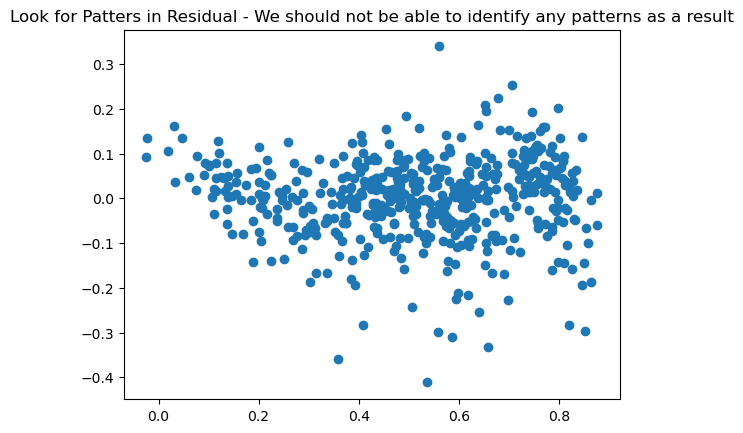

In [750]:
plt.scatter(y_train_pred,res)
plt.title("Look for Patters in Residual - We should not be able to identify any patterns as a result")
plt.show()

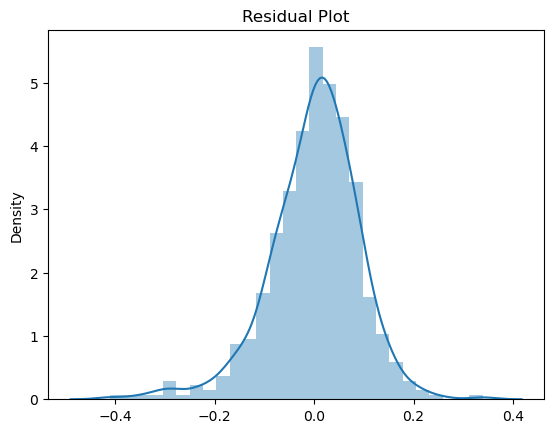

In [751]:
#Plot the Residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

The distribution plot of error term shows the normal distribution with mean at Zero.

## Step 6 - Predictions and Evaluate the model on Test Set
 In order to proceed with this evaluation,
    - we need to do the transformation on test set whatever that has been done on the training set(e.g. Min/Max scallar)
    - dropping variables which we did when building a model

In [752]:
# check test dataset before scaling
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [753]:
# Create a list of numeric vars on test set

num_vars = ['temp','hum','windspeed','cnt']

#2. Fit on data
df_test[num_vars] = scalar.transform(df_test[num_vars])
df_test[num_vars].head()

,temp,hum,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


In [754]:
df_test[num_vars].describe()

,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154
std,0.233187,0.148694,0.159584,0.219163
min,0.046591,0.261915,-0.042808,0.048205
25%,0.355429,0.529197,0.198843,0.378595
50%,0.558172,0.625590,0.300126,0.524678
75%,0.755981,0.743798,0.402718,0.677750
max,0.984424,1.002146,0.807474,0.963300


Here on the test set the Min, Max values are not 0 and 1 respectively here because we used train set to fit scalar and now 
we are transforming the same on test set, This is something expected behaviour so proceeding furthur

In [755]:
df_test.head()
y_test = df_test.pop('cnt')
X_test = df_test
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [756]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_Sat',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [757]:
X_test_new = X_test[var_final]
X_test_new.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sep,weekday_Sat,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
184,0,1,0.831783,0.084219,0,0,0,1,0,0,0,1
535,1,0,0.901354,0.153728,0,1,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,0,0,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0,0,0


In [758]:
X_test_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_Sat',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [759]:
X_test_sm = sm.add_constant(X_test_new)

In [760]:
y_test_pred = lm_final.predict(X_test_sm)

In [761]:
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.806


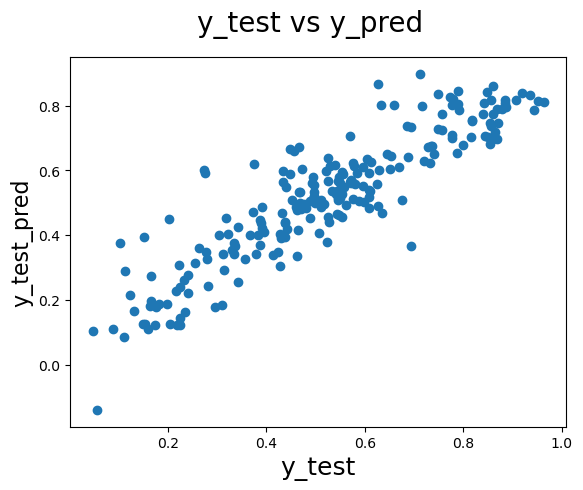

In [762]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

# Step - 7 : Conclusions

We conclude that lm_final as the right model and its prediction power is decent

In [774]:
# Print R Squared and adj. R Squared
print('\033[1mR- Sqaured train:  \033[0m', round(lm_final.rsquared,2), '  \033[1m  Adj. R-Squared train: \033[0m ', round(lm_final.rsquared_adj,3) )
print('\033[1mR- Sqaured test : \033[0m', round(r2_test,2))

R- Sqaured train:   0.84     Adj. R-Squared train:   0.832
R- Sqaured test :  0.81


In [771]:
# Print the coefficents of final varible

print('\033[1m \nCoefficent for the variables are: \033[0m')
print(round(lm_final.params,3))

 
Coefficent for the variables are: 
const                             0.196
yr                                0.234
holiday                          -0.094
temp                              0.492
windspeed                        -0.150
season_spring                    -0.067
season_summer                     0.047
season_winter                     0.082
mnth_jul                         -0.053
mnth_sep                          0.077
weekday_Sat                       0.020
weathersit_LightSnow_LightRain   -0.285
weathersit_Mist_Cloudy           -0.080
dtype: float64


So our best-fitted equation will be like

cnt = 0.196 + (0.234 X yr)-(0.094 X holiday)+(0.492 X temp)-(0.150 X windspeed)-(0.067 X season_spring)+(0.047 X season_summer)+(0.082 X season_winter) - (0.053 X mnth_jul) + (0.077 X mnth_sep) +(0.020 X Weekday_Sat) - (0.285 X weathersit_LightSnow_LightRain) - (0.080 X weathersit_Mist_Cloudy) 

The following are the top 3 features contributing significantly explaining the demand of the shared bikes:
   - Temp with co-efficient value of 0.492
   - weathersit_LightSnow_LightRain with co-efficient value of -0.285
   - and yr with co-efficient value of 0.234

So it is recommended to consider these features.

In [764]:
print("End of Model")

End of Model


In [765]:
#print(statsmodels.__version__)
